Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Maja Kubara"
STUDENT_ID = "14498863"

---

# Social Network Analysis Assignment

This assignment aims to familiarize you with the concepts and practical applications of social network analysis. You will be working with Python and the NetworkX library to create, analyze, and understand various types of networks.


---

## Task 1: Create a Small Network

**Objective:** Generate a network with 10 nodes and a density of 0.2 using NetworkX.

**Instructions:**
1. Calculate the number of edges `m` needed to achieve a density `d = 0.2` for a network of `n = 10` nodes using the formula:

$$d = \frac{2m}{n(n-1)}$$


2. Create a graph in NetworkX in variable `G` and add the calculated number of edges.
3. Ensure the network consists of one large component.

In [2]:
import networkx as nx

In [3]:
n = 10
d = 0.2

#calculate number of edges m
m = int((d*n*(n-1))/2)

#create a graph
G = nx.gnm_random_graph(n, m)
large_component = max(nx.connected_components(G), key=len)
G = G.subgraph(large_component).copy()

#check if all nodes are connected
connected = nx.is_connected(G)

print(G)
print(connected)

Graph with 6 nodes and 7 edges
True


In [4]:
assert type(G) == nx.Graph

## Task 2: Create a Non-Small-World Network

**Objective:** Write a script to generate a network that is not a small world. The network should have 500 nodes and at least 1000 edges, with an average shortest path length of at least 50.

**Instructions:**
1. Create a function `create_large_world_network` that generates a network according to the specified criteria.
2. Ensure that the network is not a small world by design.

Nodes: 500; edges: 1000; average shortest path: 62.875751503006015


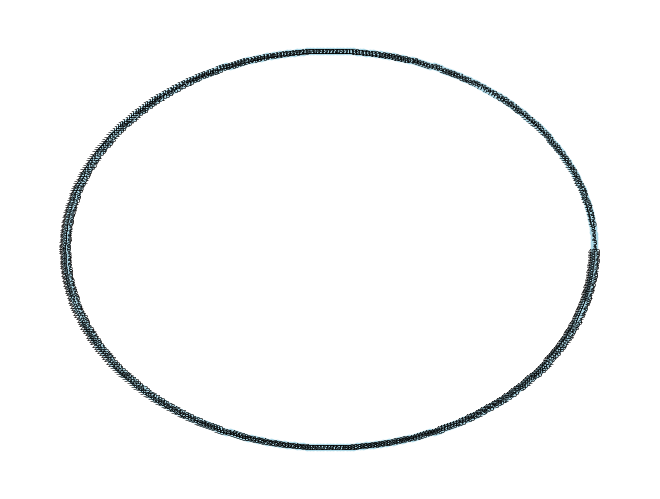

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_large_world_network(num_nodes=500, min_edges=1000, avg_shortest_path_length=50):
    G = nx.Graph()
    #add nodes in node range and edges
    for i in range(num_nodes):
        G.add_node(i)
        #connect each node to its neighbor node
        G.add_edge(i, (i + 1) % num_nodes) 
        #connect each node to its second neighbor node
        G.add_edge(i, (i + 2) % num_nodes) 

    #check the number of edges
    while G.number_of_edges() < min_edges:
        n1, n2 = random.sample(G.nodes(), 2)
        G.add_edge(n1, n2)

    #check average path length
    while nx.average_shortest_path_length(G) < avg_shortest_path_length:
        n1, n2 = random.sample(G.nodes(), 2)
        G.add_edge(n1, n2)
    
    #draw network
    nx.draw_circular(G, with_labels=True, node_color='lightblue', node_size=20, font_size=5)
    
    return G        

#apply function
G = create_large_world_network()

print(f"Nodes: {len(G.nodes())}; edges: {len(G.edges())}; average shortest path: {nx.average_shortest_path_length(G)}")



## Task 3: Analyze the Florentine Families Network

**Objective:** Analyze the Florentine families network to find the most central node in terms of PageRank, betweenness, degree, and eigenvector centrality.

**Instructions:**
1. Load the Florentine families dataset (Padget & Ansell, 1993).
2. Calculate and return the most central node for each centrality measure (PageRank, Betweenness, Degree, and Eigenvector centrality)

Node with highest PageRank centrality: Tornabuoni
Node with highest Betweenness centrality: Tornabuoni
Node with highest Degree centrality: Tornabuoni
Node with highest Eigenvector centrality: Tornabuoni


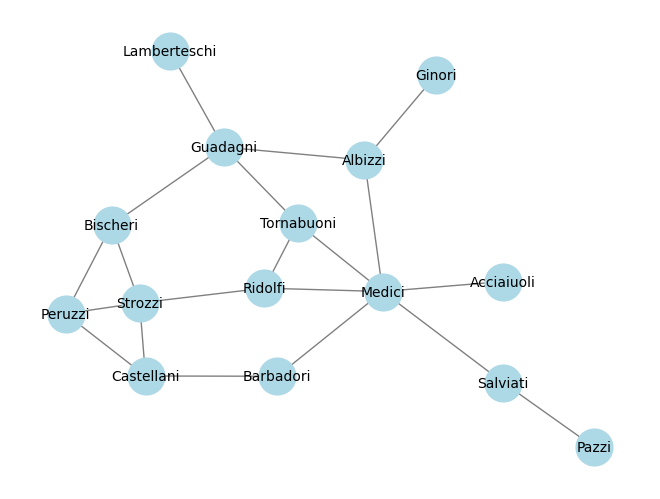

In [6]:
import matplotlib.pyplot as plt

def find_most_central_nodes(G):
    
    #use functions to find central node, and use max() function to find the most central node
    top_pagerank = max(nx.pagerank(G))
    top_betweenness = max(nx.betweenness_centrality(G))
    top_degree = max(nx.degree_centrality(G))
    top_eigenvector = max(nx.eigenvector_centrality(G))
    
    return top_pagerank, top_betweenness, top_degree, top_eigenvector

#Create graph
G = nx.florentine_families_graph()

#Find the most central nodes
top_pagerank, top_betweenness, top_degree, top_eigenvector = find_most_central_nodes(G)

print(f"Node with highest PageRank centrality: {top_pagerank}")
print(f"Node with highest Betweenness centrality: {top_betweenness}")
print(f"Node with highest Degree centrality: {top_degree}")
print(f"Node with highest Eigenvector centrality: {top_eigenvector}")

# Visualize the network
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, node_size=700)
plt.show()

---

## Task 4: Generate a Graph with Clustered Communities

**Objective:** Write a function to generate a graph with N clusters, each containing M nodes. The nodes in each cluster should be randomly connected with density D - with connections going between randomly selected nodes. The clusters should be linked with each other, to produce a single component, with as few connections as possible.

**Instructions:**
1. Create a function `create_clustered_graph` that generates a graph according to the description above.
2. Analyze the graph using Louvain community detection to examine the resulting modularity.

Now generate two networks with your algorithm. One with 3 clusters, and one with 10 clusters. The other parameters should be same as above.

Run Louvain community detection on both. Which of the networks has a higher modularity? What do you make of this?

The identified modularity is 0.7958067982542886.


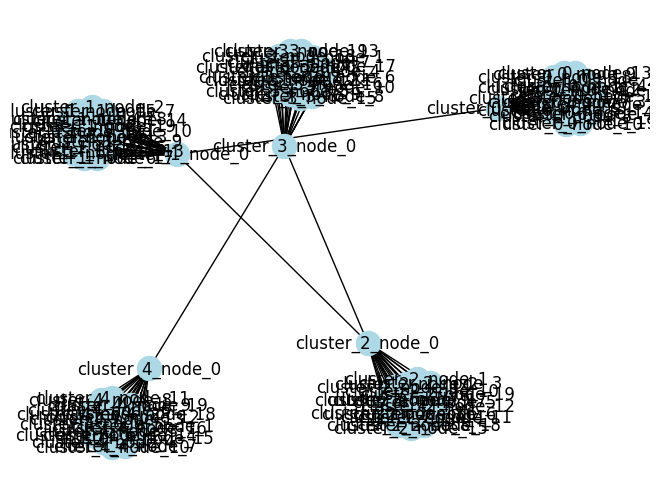

In [8]:
from community import community_louvain
import random

def create_clustered_graph(N, M, D):
    G = nx.Graph()
    
    # Create clusters in range N
    for cluster_no in range(N):
        nodes = [f"cluster_{cluster_no}_node_{i}" for i in range(M)]
        G.add_nodes_from(nodes)
        
        # Connect nodes within the cluster with density D in range M
        for i in range(M):
            for j in range(i+1, M):
                if random.random() < D:
                    G.add_edge(nodes[i], nodes[j])
    
    # Connect clusters with the least amount of edges
    for i in range(N-1):
        G.add_edge(f"cluster_{i}_node_0", f"cluster_{i+1}_node_0")

    return G

def identify_louvain_modularity(G):
    #Use Louvain to identify communities in the graph
    partition = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(partition, G)
    return modularity

#Specify numbers
num_clusters = 5
nodes_per_cluster = 20
intra_density = 1

# Create graph
G = create_clustered_graph(num_clusters, nodes_per_cluster, intra_density)
# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue')
# Modularity
modularity = identify_louvain_modularity(G)
print(f"The identified modularity is {modularity}.")


---

## Task 5: Twitter Retweet Network Analysis

**Objective:** Create a network from a Twitter dataset and analyze it to find the most central politicians and calculate the weighted homophily based on party.

**Instructions:**
1. Load the Twitter dataset, sweden_2018.df.pickle, and create a network where nodes represent politicians and edges represent retweets.
2. Calculate the weighted homophily of the network. The weighted homophily is here the tendency for individuals of the same party to form connections with one another. 
3. Identify the most central politicians using different centrality measures.

C:\Users\majak\AppData\Local\Temp\ipykernel_16072\1373168887.py:41: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  size = random.sample(all,min(number,len(all)))


The resulting homophily is 1.0.
Node with highest PageRank centrality: xpatrikx
Node with highest Betweenness centrality: xpatrikx
Node with highest Degree centrality: xpatrikx


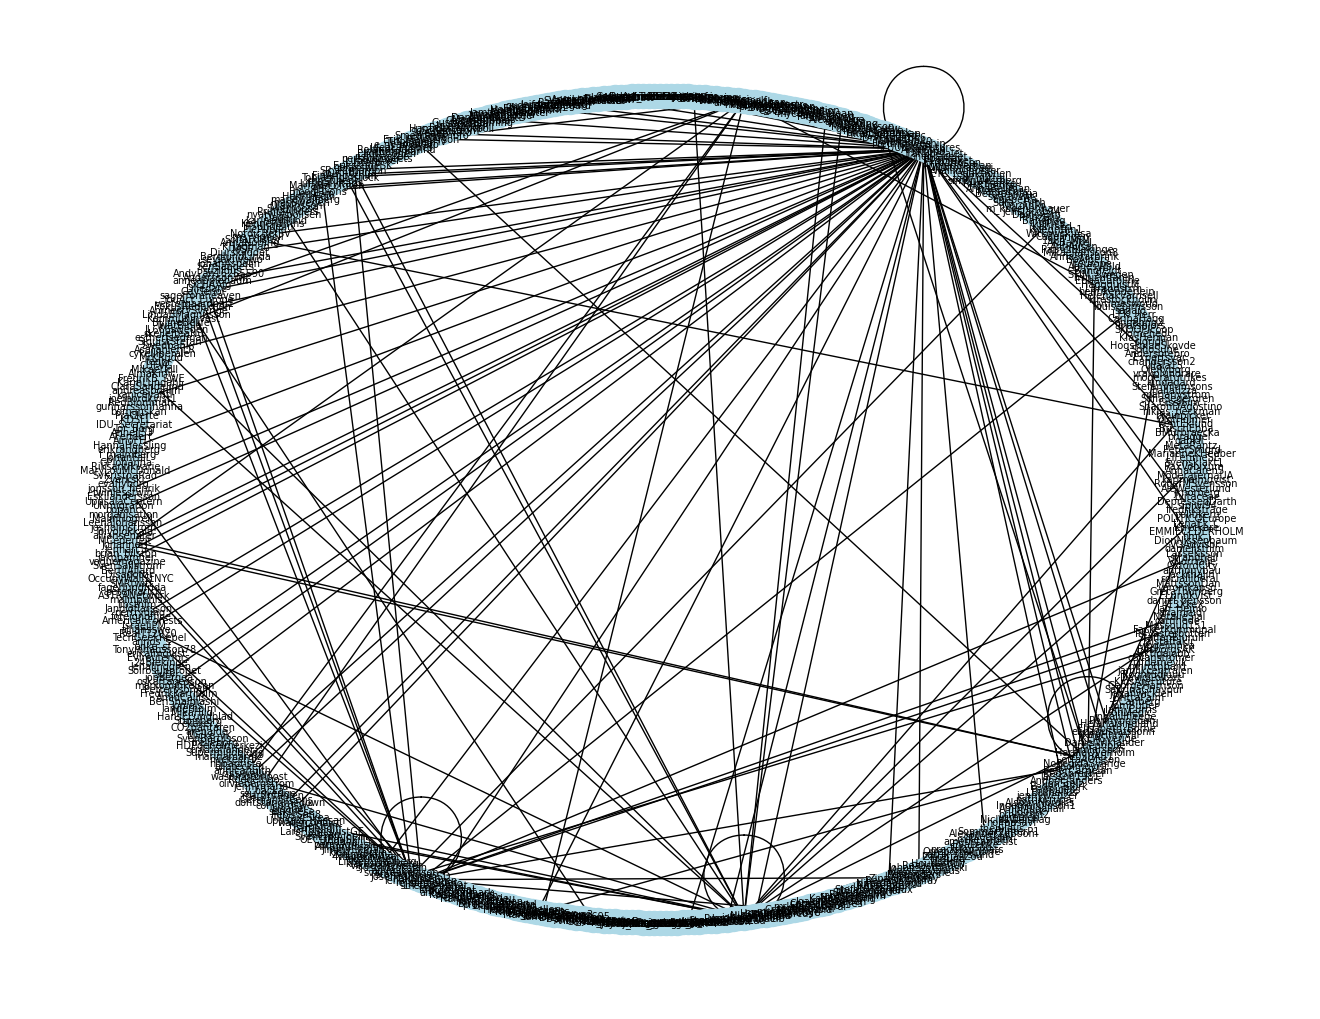

In [9]:
import pandas as pd
import re

df = pd.read_pickle('sweden_2018.df.pickle')
df['text'] = df['text'].astype(str)

def extract_retweeted_username(tweet):
    if isinstance(tweet, str):
        pattern = r'RT @(\w+):'
        match = re.search(pattern, tweet)
        if match:
            return match.group(1)  # Returns the captured username
    return None  # Returns None if no match is found

#1. Extract retweets

def extract_retweets(tweet):
    if isinstance(tweet, str):
        pattern = r'RT @(\w+): (.+)'
        match = re.search(pattern, tweet)
        if match:
            return match.group(2)
        return None

#2. Include only retweets of politicians that have also sent at least one message. 
df['retweeted_username'] = df['text'].apply(extract_retweeted_username)
df['retweets'] = df['text'].apply(extract_retweets)
df = df.dropna()

#3. Count the number of messages from each user to each user
count = df.groupby(['from_user_name', 'retweeted_username']).size().reset_index()
df = pd.merge(count, df, on = ['from_user_name','retweeted_username'])

#4. Create a weighted network from the resulting dataframe. The nodes should have include the party name as an attribute.
from_username = df['from_user_name']
to_username = df['retweeted_username']
all = set(from_username) | set(to_username)

#set a sample size to make graph readible
number = 600
size = random.sample(all,min(number,len(all)))

G = nx.Graph()

for node in size:
    G.add_node(node)

party_info = zip(df['from_user_name'],df['party'])
nx.set_node_attributes(G, party_info, 'party')

for f, t, w in zip(df['from_user_name'],df['retweeted_username'],df[0]):
    if f in size and t in size:
        G.add_edge(f,t,weight=w)

# Plot the graph
plt.figure(figsize=(13, 10))
pos = nx.circular_layout(G)  # Define the layout for better visualization
nx.draw(G, pos, with_labels=True, font_size=7, node_color='lightblue')


def calculate_weighted_homophily(graph, attribute):
    # We now want to know the homophily of the network; that is, how much likelier nodes are to connect with nodes of the same party.
    # The weighted homophily is defined as the sum of edge weights that go between nodes with the same attributes, divided by the total edge weight.
    # Unfortunately, there is no built-in function for weighted homophily in networkx, so you have to write your own function!

    same_attribute=0

    weights= nx.get_edge_attributes(G, 'weight').values()
    sum_weights=sum(weights)

    for edge in graph.edges(data=True):
        node_1, node_2, edge_details= edge
        attribute_n1= graph.nodes[node_1][attribute]
        attribute_n2= graph.nodes[node_2][attribute]
    
        if attribute_n1== attribute_n2:
            same_attribute += edge_details['weight']
    homophily_ratio=same_attribute /sum_weights

    return homophily_ratio

homophily = calculate_weighted_homophily(G, 'party')

print(f"The resulting homophily is {homophily}.")

def find_most_central_nodes(G):
    top_pagerank = max(nx.pagerank(G))
    top_betweenness = max(nx.betweenness_centrality(G))
    top_degree = max(nx.degree_centrality(G))
    top_eigenvector = max(nx.eigenvector_centrality(G, max_iter=1000), key=nx.eigenvector_centrality(G, max_iter=1000).get)
    return top_pagerank, top_betweenness, top_degree, top_eigenvector

top_pagerank, top_betweenness, top_degree, top_eigenvector = find_most_central_nodes(G)

print("Node with highest PageRank centrality:", top_pagerank)
print("Node with highest Betweenness centrality:", top_betweenness)
print("Node with highest Degree centrality:", top_degree)
